In [1]:
import pandas as pd
import numpy as np

In [2]:
# Step 1: Detect the File Encoding
import chardet

# Detect file encoding
with open('spam.csv', 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

print(f"Detected encoding: {encoding}")


Detected encoding: Windows-1252


In [3]:

from charset_normalizer import from_path

# Detect file encoding
result = from_path('spam.csv').best()
print(f"Detected encoding: {result.encoding}")


Detected encoding: cp1250


In [4]:
# Replace 'detected_encoding' with the actual encoding detected
# Step 2: Read the File with the Detected Encoding
detected_encoding = 'ISO-8859-1'  # Example: Replace with detected encoding
import pandas as pd

df = pd.read_csv('spam.csv', encoding=detected_encoding)
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
# Convert the file to UTF-8 encoding
# Step 3: Convert the File to UTF-8 (Optional)
with open('spam.csv', 'r', encoding=detected_encoding) as f:
    content = f.read()

with open('spam_utf8.csv', 'w', encoding='utf-8') as f:
    f.write(content)

print("File converted to UTF-8 and saved as 'spam_utf8.csv'")


File converted to UTF-8 and saved as 'spam_utf8.csv'


In [6]:
# Step 4: Open the File in UTF-8
df = pd.read_csv('spam_utf8.csv', encoding='utf-8')
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [7]:
df = pd.read_csv('spam_utf8.csv')

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
889,ham,Wife.how she knew the time of murder exactly,NaN,NaN,NaN
2492,ham,No drama Pls.i have had enough from you and fa...,NaN,NaN,NaN
1868,ham,Today my system sh get ready.all is well and i...,NaN,NaN,NaN
2141,ham,Alright took the morphine. Back in yo.,NaN,NaN,NaN
3646,ham,"Hey babe, my friend had to cancel, still up fo...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
# Data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(column = ['Unnamed : 2' , 'Unnamed : 3','Unnamed : 4'], inplace  = True)

TypeError: DataFrame.drop() got an unexpected keyword argument 'column'

In [ ]:
df.sample(5)

In [12]:
# renaming the columns
df.rename(columns={'v1': 'target','v2' : 'text'},inplace = True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
4803,ham,"Er, hello, things didnÛ÷t quite go to plan Û...",NaN,NaN,NaN
1271,ham,If you still havent collected the dough pls le...,NaN,NaN,NaN
2172,ham,Yavnt tried yet and never played original either,NaN,NaN,NaN
212,ham,K:)k:)good:)study well.,NaN,NaN,NaN
4504,spam,Mobile Club: Choose any of the top quality ite...,NaN,NaN,NaN


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [14]:
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
# mising valures
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [18]:
# chceck for duplicaye values
df.duplicated().sum()

403

In [19]:
df = df.drop_duplicates(keep = 'first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 5)

In [22]:
# EDA


In [23]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

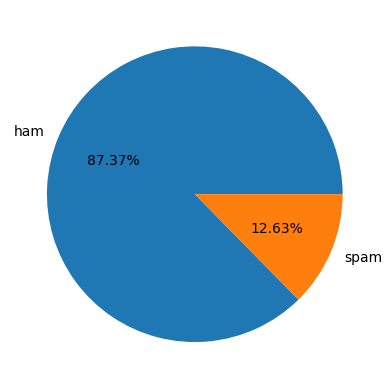

In [25]:
import matplotlib.pyplot as plt

# Example: Pie chart of target value counts
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f%%")
plt.show()


In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SHAIK MOHAMMED
[nltk_data]     YUSUF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
pip install nltk


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
df['num_characters'] = df['text'].apply(len)

In [30]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [31]:
# number of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15


In [33]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
print(df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe())
# ham messages

       num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459699    17.123782       1.820195
std         56.358868    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000


In [37]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()
# spam messages

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_words', ylabel='Count'>

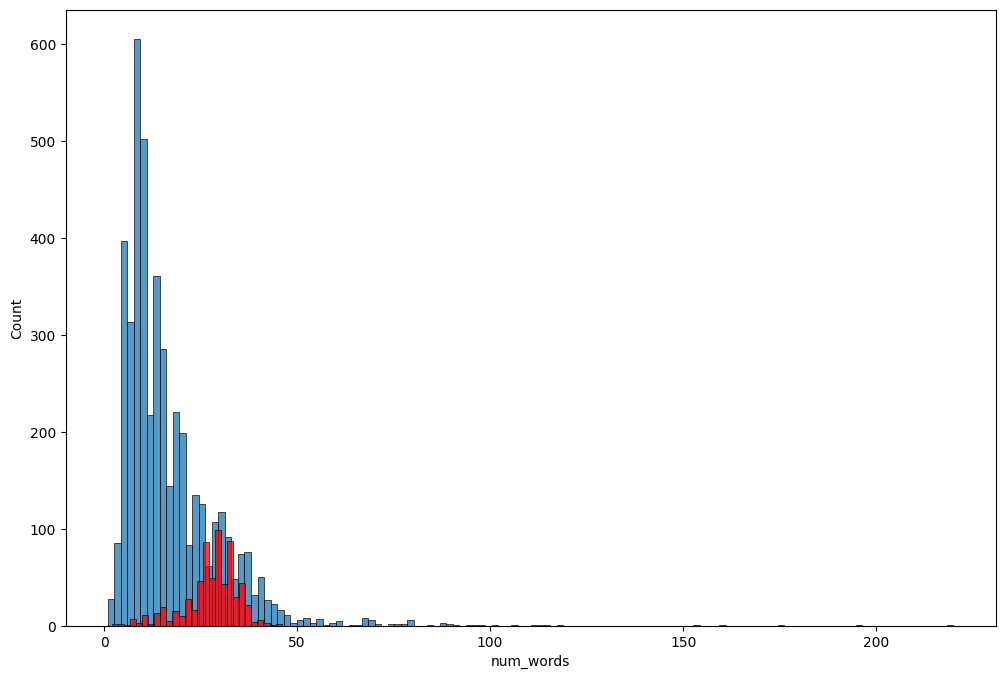

In [38]:
import seaborn as sns
plt.figure(figsize =(12,8))
sns.histplot(df[df['target']  == 0]['num_words'])
sns.histplot(df[df['target']  == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

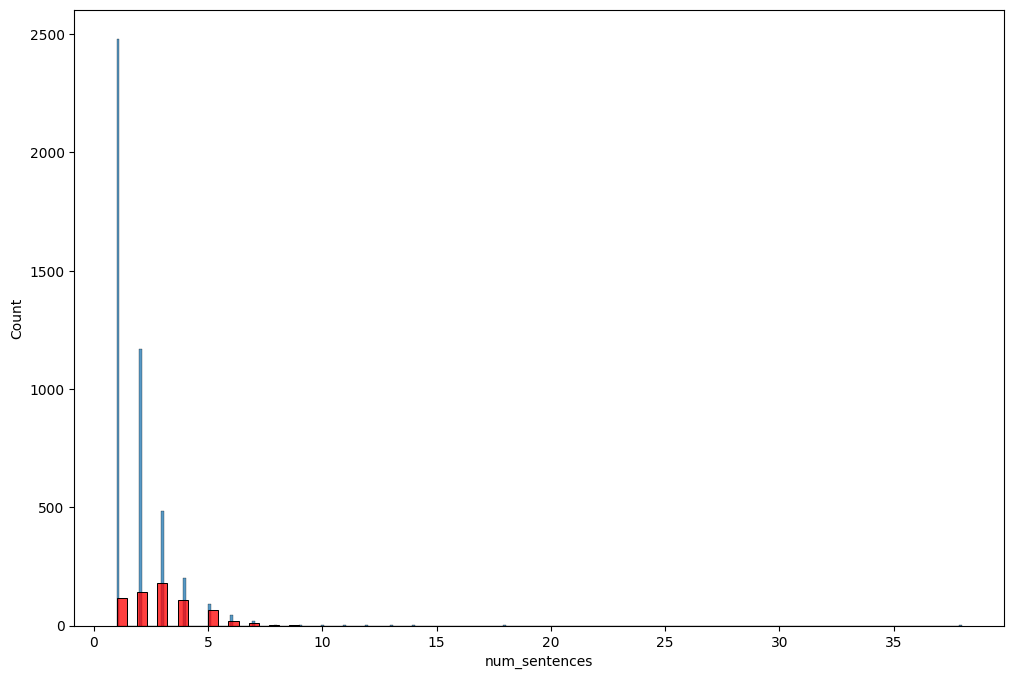

In [39]:
plt.figure(figsize =(12,8))
sns.histplot(df[df['target']  == 0]['num_sentences'])
sns.histplot(df[df['target']  == 1]['num_sentences'], color = 'red')

<Axes: xlabel='num_characters', ylabel='Count'>

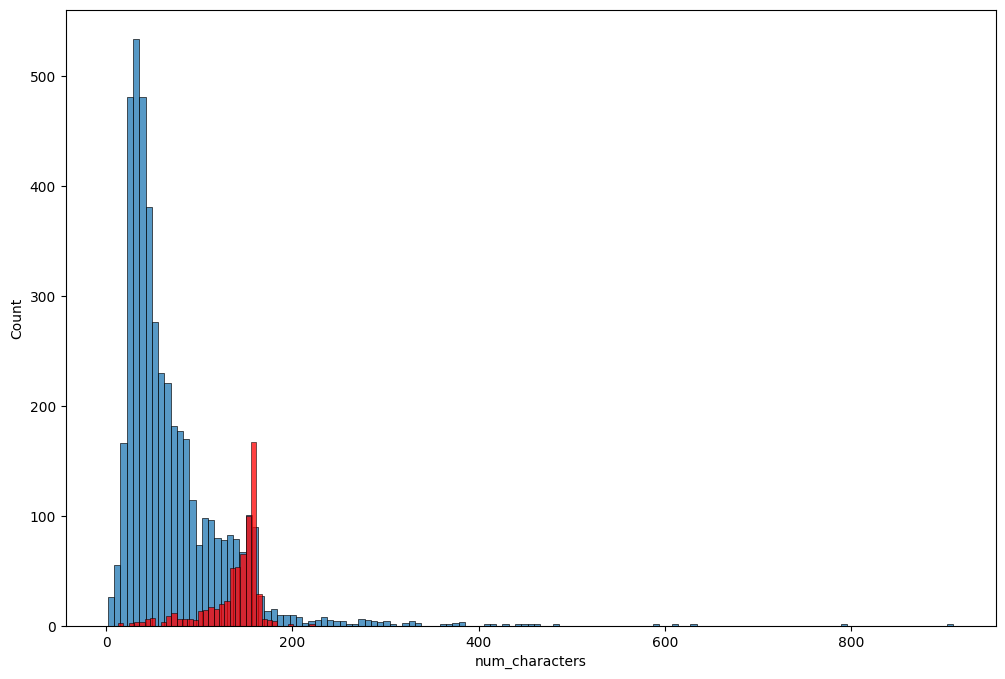

In [40]:
plt.figure(figsize =(12,8))
sns.histplot(df[df['target']  == 0]['num_characters'])
sns.histplot(df[df['target']  == 1]['num_characters'], color = 'red')

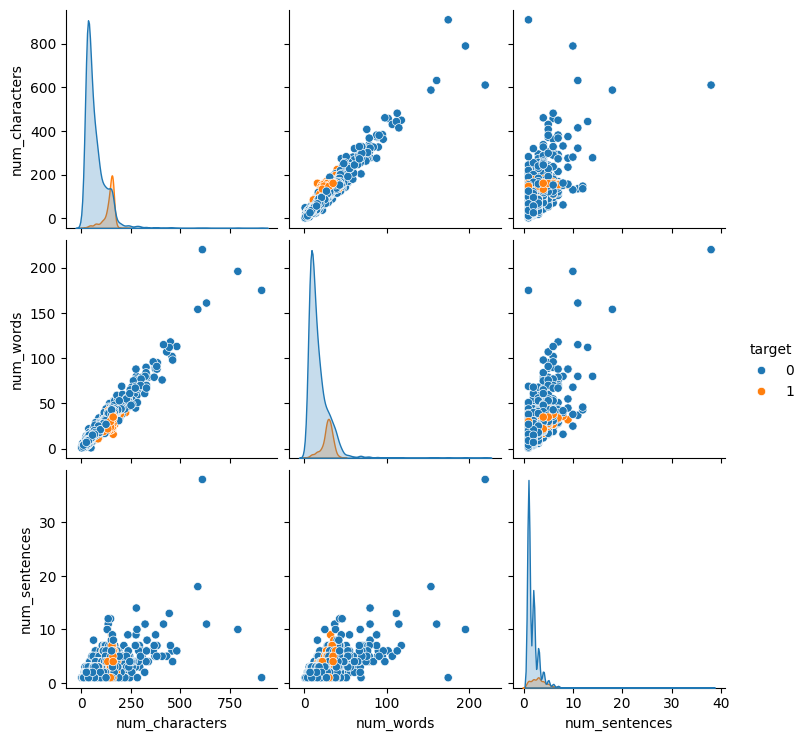

In [41]:
sns.pairplot(df,hue = 'target')

In [42]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
# 3 Data Preprocessing



In [45]:
def transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [48]:
def transform_text(text):
    # Example transformation: Convert to lowercase and remove special characters
    import re
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    return text
result = transform_text('Hi how Are you $$ 59')
print(result)  # Output: "hi how are you"


hi how are you  


In [47]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
pip install nltk



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\SHAIK MOHAMMED
[nltk_data]     YUSUF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
df['text'][1000]

'No..but heard abt tat..'

In [52]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)

In [54]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entry in a wkly comp to win fa cup final...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah i dont think he goes to usf he lives aroun...


In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
print(df.columns)


Index(['target', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'num_characters', 'num_words', 'num_sentences', 'transformed_text'],
      dtype='object')


In [57]:
print(df.head())


   target                                               text Unnamed: 2  \
0       0  Go until jurong point, crazy.. Available only ...        NaN   
1       0                      Ok lar... Joking wif u oni...        NaN   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3       0  U dun say so early hor... U c already then say...        NaN   
4       0  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  num_characters  num_words  num_sentences  \
0        NaN        NaN             111         24              2   
1        NaN        NaN              29          8              2   
2        NaN        NaN             155         37              2   
3        NaN        NaN              49         13              1   
4        NaN        NaN              61         15              1   

                                    transformed_text  
0  go until jurong point crazy available only in ...  
1                       

In [58]:
import re
from nltk.corpus import stopwords

# Define the transformation function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


In [59]:
df['transformed_text'] = df['text'].apply(preprocess_text)


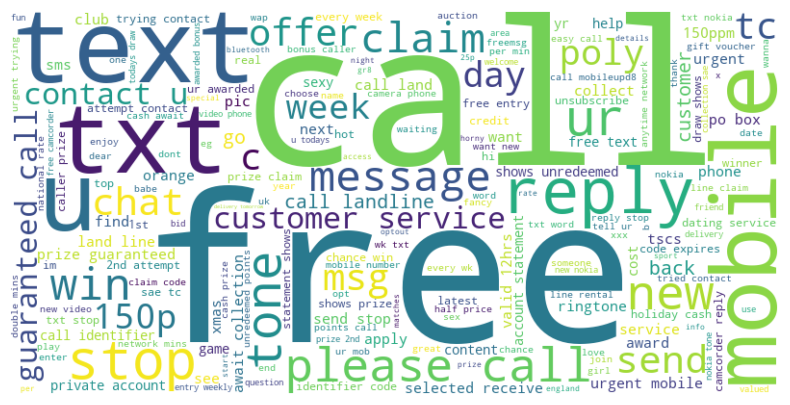

In [60]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

# Display the word cloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [62]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\SHAIK MOHAMMED
[nltk_data]     YUSUF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

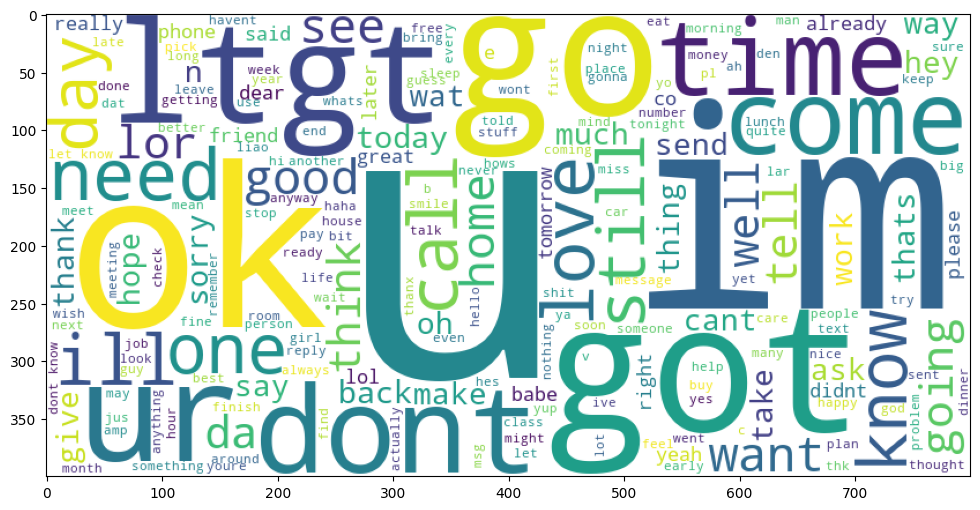

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [65]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
len(spam_corpus)

10803

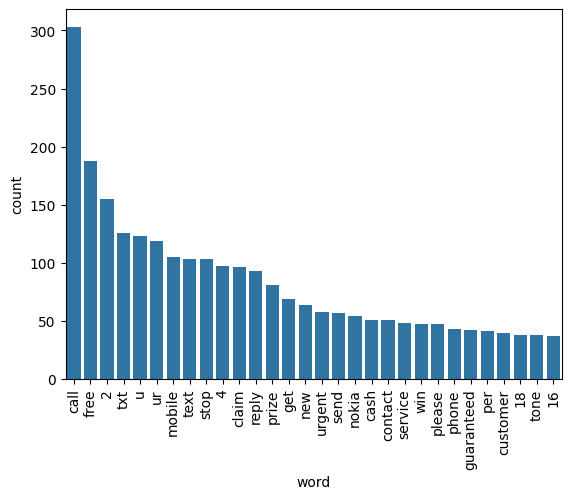

In [67]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `spam_corpus` is a list of words
spam_corpus_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Create the barplot
sns.barplot(x='word', y='count', data=spam_corpus_counts)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()


In [68]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [69]:
len(ham_corpus)

36720

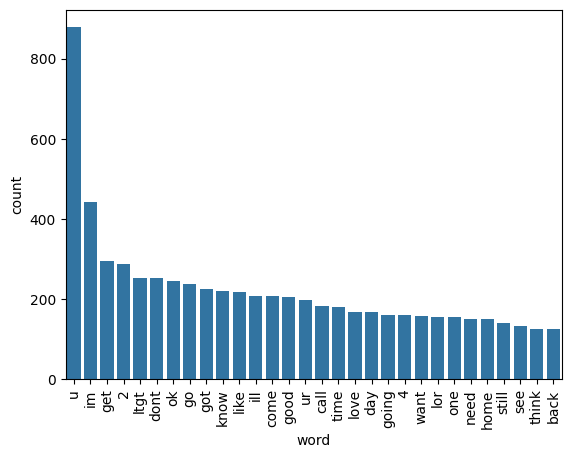

In [70]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ham_corpus` is a list of words
ham_corpus_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Create the barplot
sns.barplot(x='word', y='count', data=ham_corpus_counts)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()


In [71]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah dont think goes usf lives around though


In [ ]:
#4 Model Building

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [73]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
X.shape

(5169, 3000)

In [75]:
y = df['target'].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8829787234042553
[[797  99]
 [ 22 116]]
0.5395348837209303


In [80]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [81]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[896   0]
 [ 19 119]]
1.0


In [ ]:
# tfidf----> MNB

In [82]:
pip install xgboost



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import xgboost
print(xgboost.__version__)


1.6.2


In [84]:
pip show xgboost


Name: xgboost
Version: 1.6.2
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: C:\Users\SHAIK MOHAMMED YUSUF\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [85]:
from xgboost import XGBClassifier


In [86]:
pip install xgboost==1.6.2


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

NameError: name 'SVC' is not defined

In [88]:
# Import the required classes from scikit-learn
from sklearn.svm import SVC  # For Support Vector Classification
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors
from sklearn.naive_bayes import MultinomialNB  # For Multinomial Naive Bayes

# Instantiate the models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()

print("Models initialized successfully.")


Models initialized successfully.


In [93]:
# Import necessary classifiers
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Install if necessary

# Instantiate classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()

# Create dictionary of classifiers
clfs = {
    'SVC': svc,
    'KN': knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

print("Classifiers dictionary initialized successfully.")


Classifiers dictionary initialized successfully.


In [94]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [95]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [96]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9497098646034816
Precision -  0.8412698412698413
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9895833333333334
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551


C:\Users\SHAIK MOHAMMED YUSUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9574468085106383
Precision -  0.9433962264150944
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8852459016393442
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9593810444874274
Precision -  0.9210526315789473
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743


In [97]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [98]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.972921,1.000000
4,LR,0.957447,0.989583
8,ETC,0.977756,0.983193
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
10,xgb,0.973888,0.974359
6,AdaBoost,0.957447,0.943396
9,GBDT,0.959381,0.921053
7,BgC,0.957447,0.885246


In [99]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [100]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,NB,Accuracy,0.972921
2,LR,Accuracy,0.957447
3,ETC,Accuracy,0.977756
4,RF,Accuracy,0.974855
5,SVC,Accuracy,0.975822
6,xgb,Accuracy,0.973888
7,AdaBoost,Accuracy,0.957447
8,GBDT,Accuracy,0.959381
9,BgC,Accuracy,0.957447


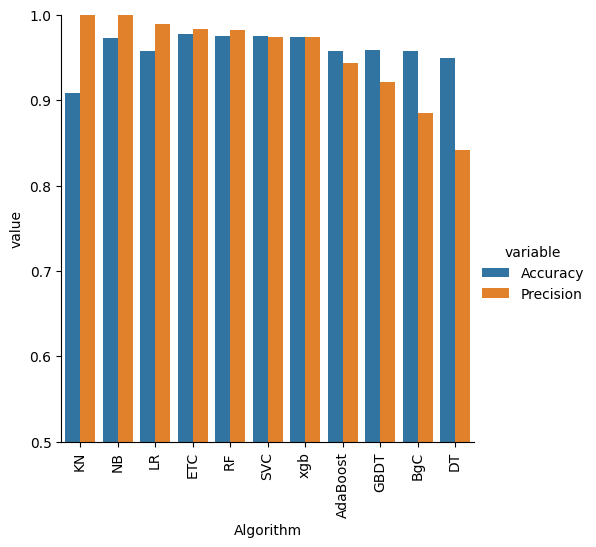

In [101]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [102]:
# model improve
# Change the max_features parameter of TfIdf

In [103]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [105]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [106]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [107]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [108]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000
1,NB,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
2,LR,0.957447,0.989583,0.957447,0.989583,0.957447,0.989583,0.957447,0.989583
3,ETC,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193
4,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
5,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
6,xgb,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359
7,AdaBoost,0.957447,0.943396,0.957447,0.943396,0.957447,0.943396,0.957447,0.943396
8,GBDT,0.959381,0.921053,0.959381,0.921053,0.959381,0.921053,0.959381,0.921053
9,BgC,0.957447,0.885246,0.957447,0.885246,0.957447,0.885246,0.957447,0.885246


In [109]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [110]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [111]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [112]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9916666666666667


In [113]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier

In [114]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.953125
